# Netflix Movies and TV Shows Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Exploration

In [4]:
netflix = pd.read_csv("../data/netflix_titles.csv")

In [5]:
netflix.rename(columns={"release_year":"year", "listed_in":"genre"}, inplace=True)

In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_id      8807 non-null   object
 1   type         8807 non-null   object
 2   title        8807 non-null   object
 3   director     6173 non-null   object
 4   cast         7982 non-null   object
 5   country      7976 non-null   object
 6   date_added   8797 non-null   object
 7   year         8807 non-null   int64 
 8   rating       8803 non-null   object
 9   duration     8804 non-null   object
 10  genre        8807 non-null   object
 11  description  8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
netflix.describe(include="all")

,show_id,type,title,director,cast,country,date_added,year,rating,duration,genre,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
unique_values = netflix.nunique()
print(unique_values)

show_id        8807
type              2
title          8807
director       4528
cast           7692
country         748
date_added     1767
year             74
rating           17
duration        220
genre           514
description    8775
dtype: int64


###### **Categorical columns**: *type, country, year, rating, genre*
###### **Numerical columns**: *duration*

## Data Cleaning

In [12]:
netflix.shape

(8807, 12)

In [13]:
netflix.isna().sum()

show_id           0
type              0
title             0
director       2634
cast            825
country         831
date_added       10
year              0
rating            4
duration          3
genre             0
description       0
dtype: int64

In [14]:
threshold = len(netflix) * 0.05
print(threshold)

440.35


In [15]:
columns_to_drop = netflix.columns[(netflix.isna().sum() <= threshold) & (netflix.isna().sum() > 0)]
print(columns_to_drop)

Index(['date_added', 'rating', 'duration'], dtype='object')


In [16]:
netflix.dropna(subset=columns_to_drop, inplace=True)
netflix["director"] = netflix["director"].fillna("Unknown")
netflix["cast"] = netflix["cast"].fillna("Unknown")
netflix["country"] = netflix["country"].fillna("Unknown")

In [17]:
netflix.isna().sum()

show_id        0
type           0
title          0
director       0
cast           0
country        0
date_added     0
year           0
rating         0
duration       0
genre          0
description    0
dtype: int64

In [18]:
netflix.shape

(8790, 12)

In [19]:
netflix["duration"] = netflix["duration"].str.replace(" min", "", regex=False)
netflix["duration"] = netflix["duration"].str.replace(r" Seasons?", "", regex=True).astype("int")
netflix["genre"] = netflix["genre"].str.replace(" Movies", "", regex=False)
netflix["genre"] = netflix["genre"].str.replace(" TV Shows|TV|'", "", regex=True)
netflix["genre"] = netflix["genre"].str.split(", ")

## General Analysis

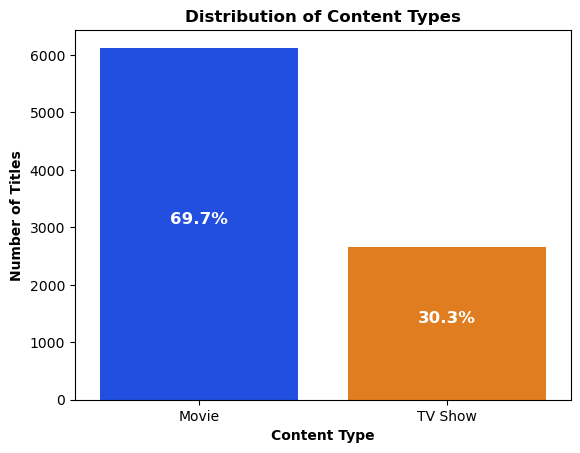

In [106]:
sns.countplot(data=netflix, x="type", hue="type", palette="bright")
plt.title("Distribution of Content Types", fontsize=12, fontweight="bold")
plt.xlabel("Content Type", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.text(0, 3063, '69.7%', fontsize=12, fontweight="bold", color='white', ha='center')
plt.text(1, 1332, '30.3%', fontsize=12, fontweight="bold", color='white', ha='center')
plt.show()

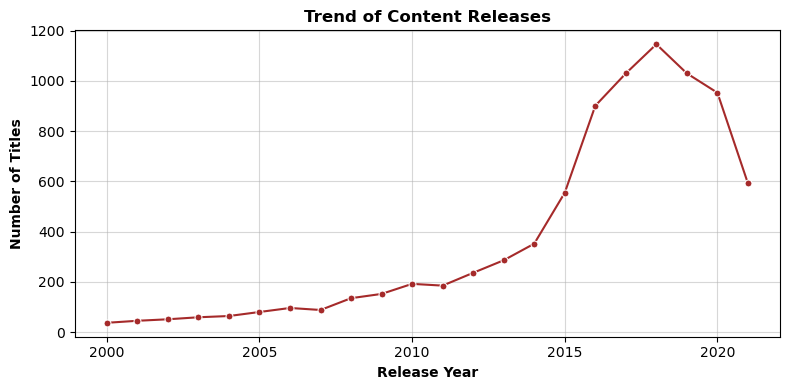

In [22]:
trend_by_year = netflix["year"].value_counts().sort_index().reset_index()
trend_by_year = trend_by_year[trend_by_year["year"] >= 2000]

plt.figure(figsize=(8, 4))
sns.lineplot(data=trend_by_year, x="year", y="count", color="brown", marker="o", markersize=5)
plt.title("Trend of Content Releases", fontsize=12, fontweight="bold")
plt.xlabel("Release Year", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

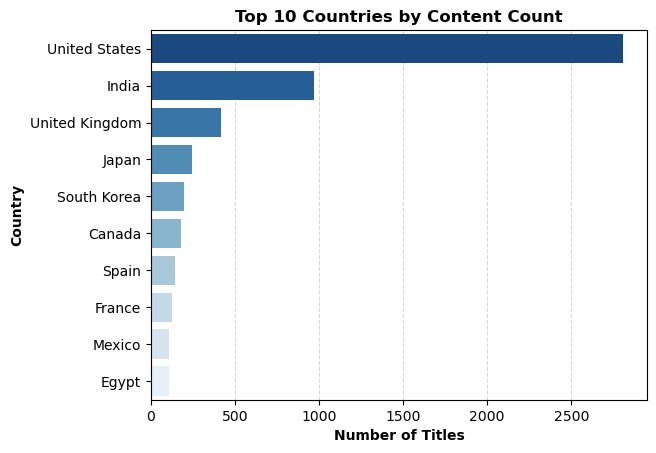

In [23]:
top_countries = netflix["country"].value_counts().drop("Unknown").iloc[0:10].reset_index()

sns.barplot(data=top_countries, y="country", x="count", hue="country", palette="Blues_r", zorder=2)
plt.title("Top 10 Countries by Content Count", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Country", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.show()

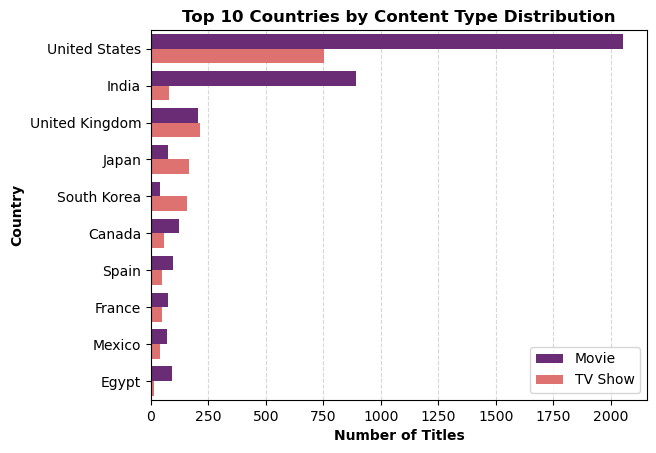

In [24]:
top_countries = netflix["country"].value_counts().drop("Unknown").iloc[0:10].index
type_by_country = netflix[netflix["country"].isin(top_countries)][["type", "country"]]

sns.countplot(data=type_by_country, y="country", hue="type", palette="magma", order=top_countries, zorder=2)
plt.title("Top 10 Countries by Content Type Distribution", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Country", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.legend().set_title("")
plt.show()

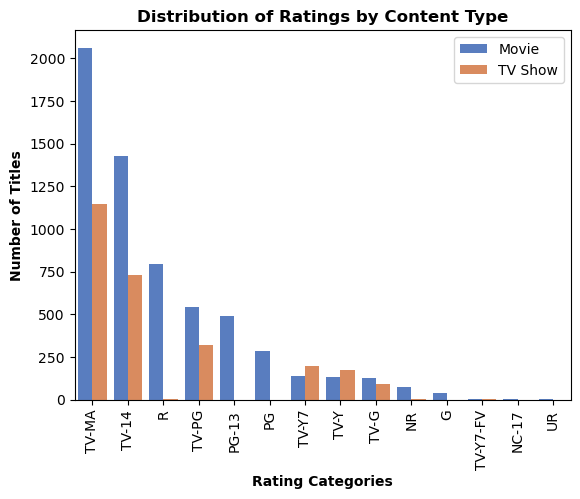

In [25]:
ratings_by_type = netflix[["rating", "type"]].value_counts().reset_index()

sns.barplot(data=ratings_by_type, x="rating", y="count", hue="type", palette="muted")
plt.title("Distribution of Ratings by Content Type", fontsize=12, fontweight="bold")
plt.xlabel("Rating Categories", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.legend().set_title("")
plt.xticks(rotation=90)
plt.show()

## Movies Analysis

In [27]:
movies = netflix[netflix["type"] == "Movie"].copy()
movies_exploded = movies.explode("genre")

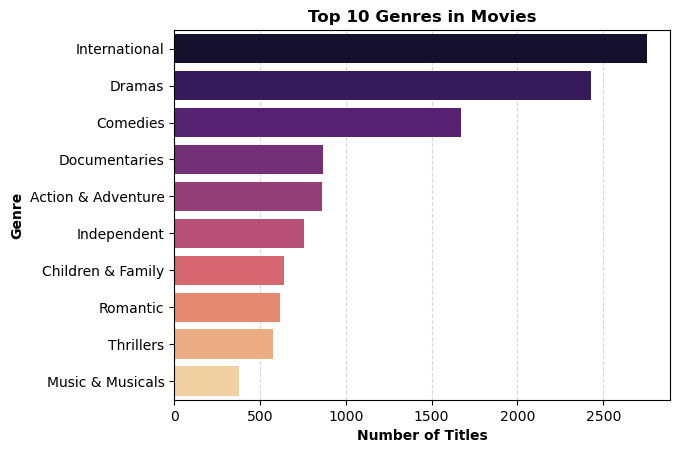

In [28]:
movie_genre_count = movies_exploded["genre"].value_counts().iloc[0:10].reset_index()
top_movie_genres = movie_genre_count["genre"].iloc[0:10]

sns.barplot(data=movie_genre_count, y="genre", x="count", hue="genre", palette="magma", zorder=2)
plt.title("Top 10 Genres in Movies", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Genre", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.show()

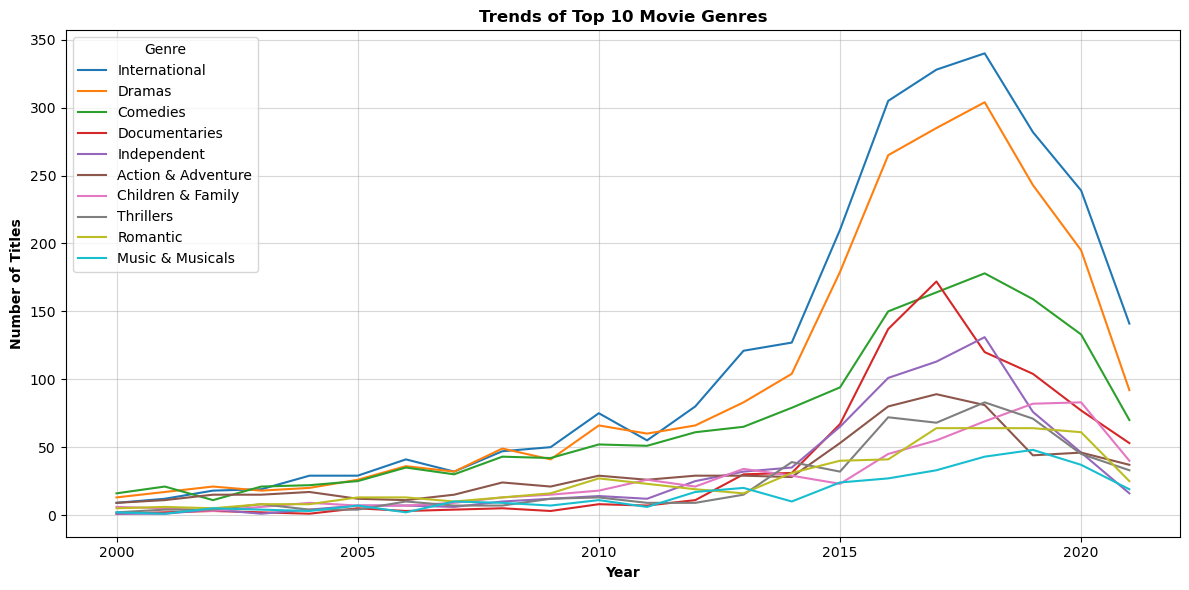

In [29]:
movie_genre_by_year = movies_exploded[movies_exploded["genre"].isin(top_movie_genres)][["genre", "year"]].value_counts().reset_index()
movie_genre_by_year = movie_genre_by_year[movie_genre_by_year["year"] >= 2000]

plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_genre_by_year, x="year", y="count", hue="genre", palette="tab10")
plt.title("Trends of Top 10 Movie Genres", fontsize=12, fontweight='bold')
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.legend().set_title("Genre")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

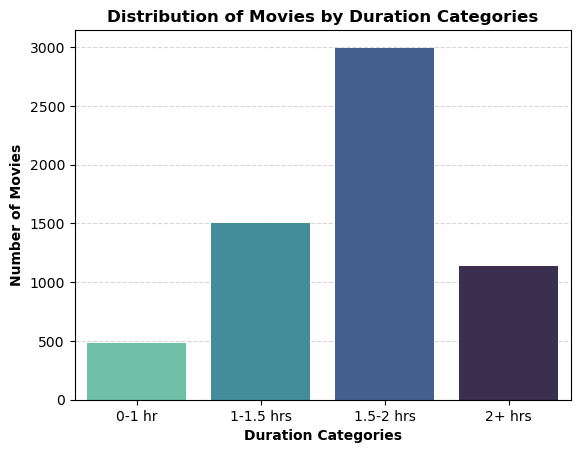

In [30]:
less_than_one_hour = 60
one_to_one_half_hour = 90
one_half_to_two_hour = 120
above_two_hours = movies["duration"].max()

labels = ["0-1 hr", "1-1.5 hrs", "1.5-2 hrs", "2+ hrs"]
bins = [0, less_than_one_hour, one_to_one_half_hour, one_half_to_two_hour, above_two_hours]

movies["duration_category"] = pd.cut(movies["duration"], labels=labels, bins=bins, right=True)
movie_duration_category = movies["duration_category"].value_counts().reset_index()

sns.barplot(data=movie_duration_category, x="duration_category", y="count", hue="duration_category", palette="mako_r", zorder=2)
plt.title("Distribution of Movies by Duration Categories", fontsize=12, fontweight="bold")
plt.xlabel("Duration Categories", fontsize=10, fontweight="bold")
plt.ylabel("Number of Movies", fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5, zorder=1)
plt.show()

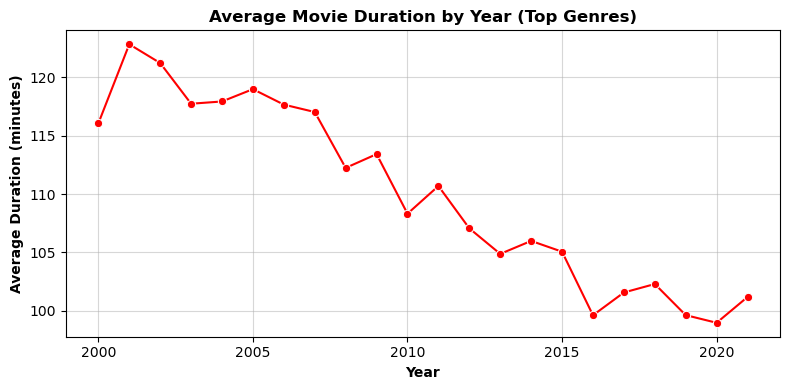

In [31]:
movie_duration_by_year = movies_exploded[movies_exploded["genre"].isin(top_movie_genres)][["duration", "year"]]
movie_duration_by_year = movie_duration_by_year.groupby("year")["duration"].agg("mean").reset_index()
movie_duration_by_year = movie_duration_by_year[movie_duration_by_year["year"] >= 2000]

plt.figure(figsize=(8, 4))
sns.lineplot(data=movie_duration_by_year, x="year", y="duration", marker="o", color="red")
plt.title("Average Movie Duration by Year (Top Genres)", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.ylabel("Average Duration (minutes)", fontsize=10, fontweight="bold")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

----------------------------------------------------------------------

## TV Shows Analysis

In [34]:
tv_shows = netflix[netflix["type"] == "TV Show"].copy()
tv_shows_exploded = tv_shows.explode("genre")

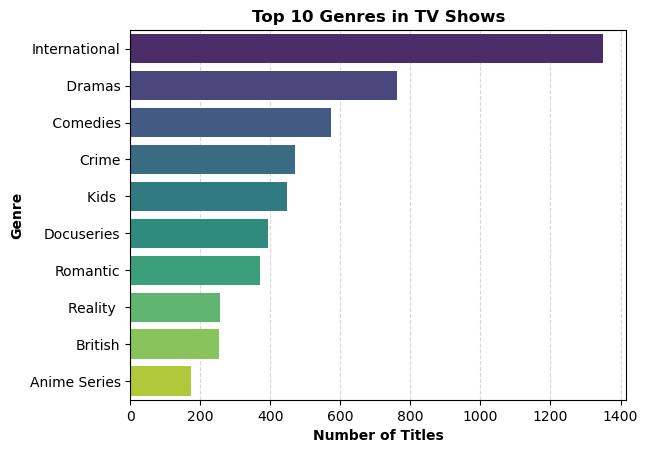

In [35]:
tv_shows_genre_count = tv_shows_exploded["genre"].value_counts().iloc[0:10].reset_index()
top_tv_show_genres = tv_shows_genre_count["genre"].iloc[0:10]

sns.barplot(data=tv_shows_genre_count, y="genre", x="count", hue="genre", palette="viridis", zorder=2)
plt.title("Top 10 Genres in TV Shows", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Genre", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5, zorder=0)
plt.show()

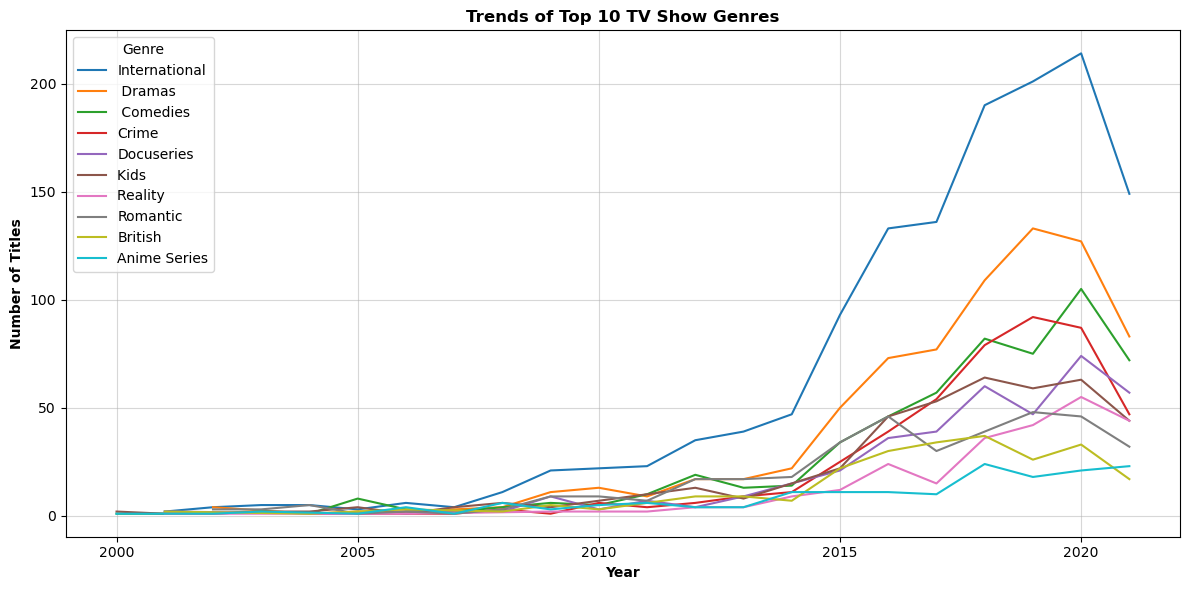

In [36]:
tv_show_genre_by_year = tv_shows_exploded[tv_shows_exploded["genre"].isin(top_tv_show_genres)][["genre", "year"]].value_counts().reset_index()
tv_show_genre_by_year = tv_show_genre_by_year[tv_show_genre_by_year["year"] >= 2000]

plt.figure(figsize=(12, 6))
sns.lineplot(data=tv_show_genre_by_year, x="year", y="count", hue="genre", palette="tab10")
plt.title("Trends of Top 10 TV Show Genres", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.ylabel("Number of Titles", fontsize=10, fontweight="bold")
plt.legend().set_title("Genre")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

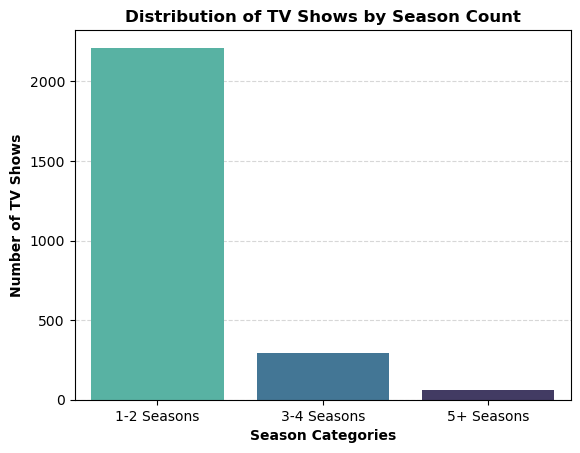

In [37]:
max_two_seasons = 2
three_to_four_seasons = 4
five_or_more_seasons = 5

labels = ["1-2 Seasons", "3-4 Seasons", "5+ Seasons"]
bins = [0, max_two_seasons, three_to_four_seasons, five_or_more_seasons]

tv_shows["duration_category"] = pd.cut(tv_shows["duration"], labels=labels, bins=bins, right=True)
tv_show_duration_category = tv_shows["duration_category"].value_counts().reset_index()

sns.barplot(data=tv_show_duration_category, x="duration_category", y="count", hue="duration_category", palette="mako_r", zorder=2)
plt.title("Distribution of TV Shows by Season Count", fontsize=12, fontweight="bold")
plt.xlabel("Season Categories", fontsize=10, fontweight="bold")
plt.ylabel("Number of TV Shows", fontsize=10, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5, zorder=1)
plt.show()

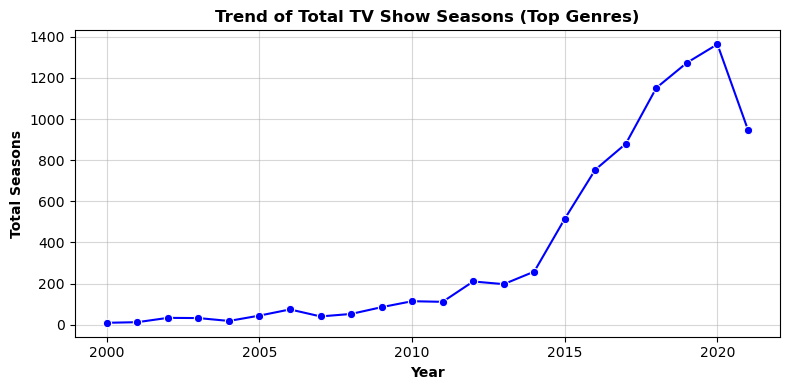

In [38]:
tv_show_season_by_year = tv_shows_exploded[tv_shows_exploded["genre"].isin(top_tv_show_genres)][["duration", "year"]]
tv_show_season_by_year = tv_show_season_by_year[tv_show_season_by_year["year"] >= 2000]
tv_show_season_by_year = tv_show_season_by_year.groupby("year")["duration"].agg("sum").reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=tv_show_season_by_year, x="year", y="duration", marker="o", color="blue")
plt.title("Trend of Total TV Show Seasons (Top Genres)", fontsize=12, fontweight="bold")
plt.xlabel("Year", fontsize=10, fontweight="bold")
plt.ylabel("Total Seasons", fontsize=10, fontweight="bold")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()